```{contents}
```

# How to select cluster $k$ 

## **1. The Challenge**

* If $k$ is too small → clusters are too broad, losing detail.
* If $k$ is too large → clusters are too fragmented, may capture noise.

We need a method to **balance fit and simplicity**.

---

## **2. Methods to Select $k$**

### **A. Elbow Method**

1. Run K-Means with different $k$ values (e.g., 1–10).
2. For each $k$, calculate **Within-Cluster Sum of Squares (WCSS)**:

$$
\text{WCSS} = \sum_{i=1}^{k} \sum_{x_j \in C_i} ||x_j - \mu_i||^2
$$

* $C_i$ = cluster $i$
* $\mu_i$ = centroid of cluster $i$

3. Plot $k$ vs WCSS.
4. Look for the **"elbow point"** where WCSS stops decreasing significantly.

   * This is usually the optimal $k$.

**Intuition:** After this point, adding more clusters doesn’t reduce variance much.

---

### **B. Silhouette Score**

* Measures how similar a point is to its own cluster vs other clusters.

$$
s = \frac{b - a}{\max(a, b)}
$$

* $a$ = average distance to points in the same cluster
* $b$ = average distance to points in the nearest other cluster
* Range: -1 (bad) to 1 (good)

**How to use:**

* Compute silhouette score for different $k$ values.
* Pick $k$ with **highest silhouette score**.

---

### **C. Gap Statistic**

* Compares the WCSS of your data with that of **randomly generated data**.
* The optimal $k$ is where your clustering is **much better than random**.

---

### **D. Domain Knowledge**

* Sometimes, the optimal number of clusters is determined by **business or scientific understanding**.
* Example: Customer segments, types of plants, or categories you already know exist.

---

### **E. Cross-validation (Optional)**

* For advanced cases, you can use **stability-based methods**:

  * Split data
  * Run clustering
  * Check how consistently points are assigned
* Higher stability → better $k$

---

### **3. Key Intuition**

* You want clusters that are **tight (points close to centroids)** and **well-separated (clusters far from each other)**.
* Optimal $k$ balances **compactness** and **separation**.

---


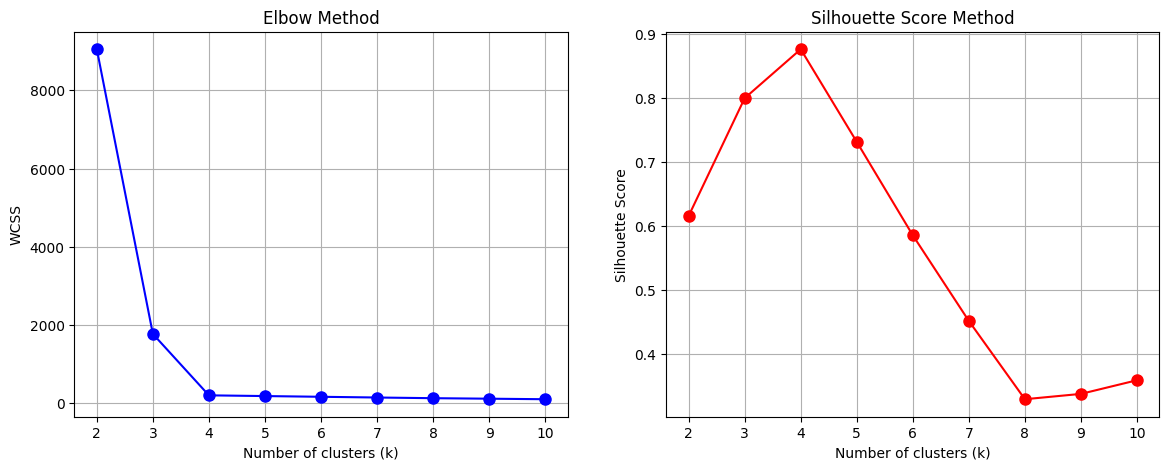

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Elbow Method
wcss = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # WCSS
    sil_scores.append(silhouette_score(X, kmeans.labels_))

# Plot WCSS (Elbow Method)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(K, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, 'ro-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid(True)

plt.show()


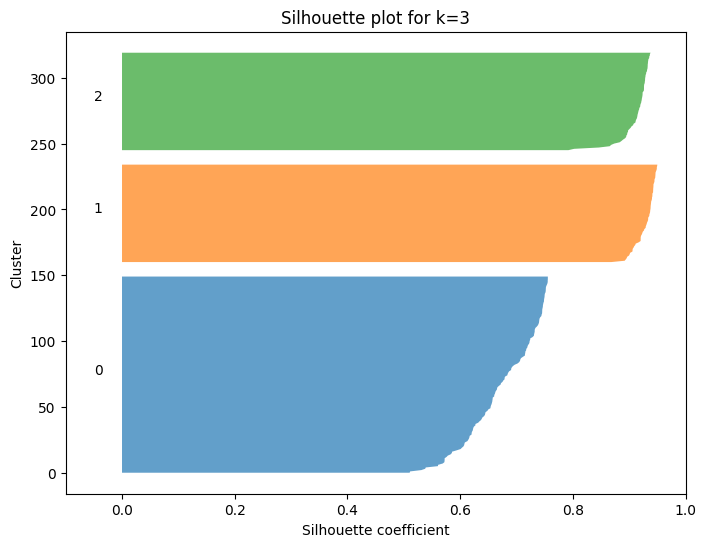

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import numpy as np

# Assume X is your data
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# Compute silhouette scores
sil_scores = silhouette_samples(X, labels)

y_lower = 0
plt.figure(figsize=(8,6))

for i in range(k):
    cluster_scores = sil_scores[labels == i]
    cluster_scores.sort()
    y_upper = y_lower + len(cluster_scores)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_scores,
                      alpha=0.7)
    plt.text(-0.05, y_lower + len(cluster_scores)/2, str(i))
    y_lower = y_upper + 10  # add gap between clusters

plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster")
plt.title(f"Silhouette plot for k={k}")
plt.xlim([-0.1, 1])
plt.show()


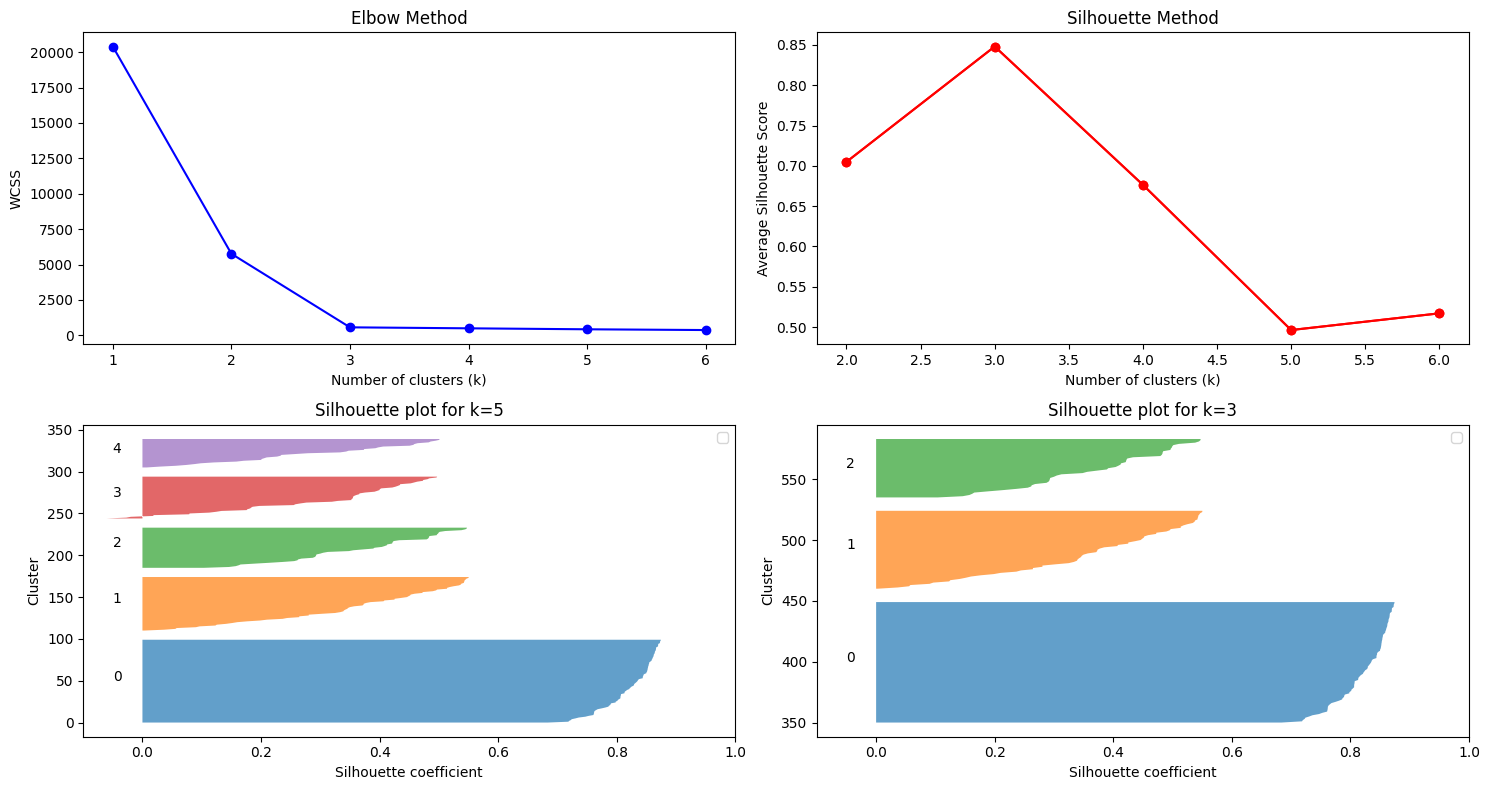

In [23]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore")
# Generate sample data
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
fig = plt.figure(figsize=(15, 8))
# Elbow Method
wcss = []
K = range(1, 7)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
ax1 = fig.add_subplot(221)
ax1.plot(K, wcss, 'bo-')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('WCSS')
ax1.set_title('Elbow Method')
# ax1.show()

# Silhouette Method
sil_scores = []
K = range(2, 7)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    sil_scores.append(silhouette_score(X, labels))

ax2 = fig.add_subplot(222)
ax2.plot(K, sil_scores, 'ro-')
ax2.plot(K, sil_scores, 'ro-')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Average Silhouette Score')
ax2.set_title('Silhouette Method')

# Assume X is your data
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# Compute silhouette scores
sil_scores = silhouette_samples(X, labels)

y_lower = 0
# plt.figure(figsize=(8,6))
ax3 = fig.add_subplot(223)
for i in range(k):
    cluster_scores = sil_scores[labels == i]
    cluster_scores.sort()
    y_upper = y_lower + len(cluster_scores)
    ax3.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_scores,
                      alpha=0.7)
    ax3.text(-0.05, y_lower + len(cluster_scores)/2, str(i))
    y_lower = y_upper + 10  # add gap between clusters

ax3.set_xlabel("Silhouette coefficient")
ax3.set_ylabel("Cluster")
ax3.set_title(f"Silhouette plot for k={k}")
ax3.set_xlim([-0.1, 1])
ax3.legend()
k=3
ax4 = fig.add_subplot(224)
for i in range(k):
    cluster_scores = sil_scores[labels == i]
    cluster_scores.sort()
    y_upper = y_lower + len(cluster_scores)
    ax4.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_scores,
                      alpha=0.7)
    ax4.text(-0.05, y_lower + len(cluster_scores)/2, str(i))
    y_lower = y_upper + 10  # add gap between clusters

ax4.set_xlabel("Silhouette coefficient")
ax4.set_ylabel("Cluster")
ax4.set_title(f"Silhouette plot for k={k}")
ax4.set_xlim([-0.1, 1])
ax4.legend()
plt.tight_layout()
plt.show()

## **1. Using the Elbow Method**

### **Step-by-Step Interpretation**

1. Plot **WCSS (Within-Cluster Sum of Squares)** vs number of clusters $k$.
2. Look for the **“elbow” point**:

   * WCSS decreases sharply initially as clusters are added.
   * After some point, the decrease slows down → adding more clusters doesn’t improve much.
3. The **elbow point** is typically the optimal $k$.

**Intuition:**

* Before the elbow → adding clusters significantly reduces variance → meaningful separation.
* After the elbow → diminishing returns → too many clusters may overfit.

---

### **Example (Hypothetical WCSS Plot)**

| k | WCSS |
| - | ---- |
| 1 | 1000 |
| 2 | 500  |
| 3 | 300  |
| 4 | 200  |
| 5 | 180  |
| 6 | 170  |

* Sharp drop till **k=3** → the elbow → choose **k=3**.

---

## **2. Using the Silhouette Curve**

### **Step-by-Step Interpretation**

1. For each $k$, compute **silhouette scores** of all points.
2. Plot the **silhouette curve** (bars for each cluster).
3. Check:

   * **Average silhouette score**: higher is better (closer to 1).
   * **Bar width**: uniform bars indicate evenly distributed clusters.
   * **Negative values**: indicate misclassified points.

**Intuition:**

* Large positive silhouette → cluster is tight and well-separated.
* Small or negative silhouette → cluster overlaps with others → may need fewer/more clusters.

---

### **Example (Hypothetical Silhouette Scores)**

| k | Average Silhouette Score |
| - | ------------------------ |
| 2 | 0.55                     |
| 3 | 0.65                     |
| 4 | 0.60                     |
| 5 | 0.50                     |

* Highest score at **k=3** → suggests **k=3** clusters.

---

## **3. Combined Interpretation**

| Method           | Observation                        | Suggested k |
| ---------------- | ---------------------------------- | ----------- |
| Elbow Method     | WCSS “elbow” at k=3                | 3           |
| Silhouette Score | Maximum average score at k=3       | 3           |
| ✅ Conclusion     | Both methods agree → optimal k = 3 | 3           |

**Tip:** Always consider **both methods**.

* Elbow gives **variance-based intuition**.
* Silhouette gives **cohesion/separation intuition**.

---

**Interpretation from plots:**

* Find the elbow in the first plot → suggests a candidate $k$.
* Find maximum silhouette in the second plot → confirms the candidate.
* Final $k$ is where both methods agree.
